In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
df = pd.read_csv("bank_transactions_data_2.csv")

In [9]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [10]:
#Checking for missing values
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [11]:
df=df.drop(columns=['TransactionID','AccountID','TransactionDate','DeviceID','IP Address','MerchantID','PreviousTransactionDate'],axis=1)

In [12]:
#Encoding 
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70,0,81,1,5112.21
1,376.24,1,15,0,68,0,141,1,13758.91
2,126.29,1,23,2,19,3,56,1,1122.35
3,184.50,1,33,2,26,3,25,1,8569.06
4,13.45,0,1,2,26,3,198,1,7429.40


In [13]:
#Splitting the dataset
X = df.drop("TransactionType",axis=1)
y = df['TransactionType']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(2009, 8) (503, 8)


In [15]:
#Feature Scaling
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

In [16]:
#Train the model
kernels = ['linear','rbf','poly']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel,C=1,random_state=42)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    results[kernel] = acc

    print("Accuracy for ",kernel," is: ",acc)
    print(classification_report(y_test,y_pred,target_names=['Credit (0)','Debit (1)']))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy for  linear  is:  0.7773359840954275
              precision    recall  f1-score   support

  Credit (0)       0.00      0.00      0.00       112
   Debit (1)       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.39      0.50      0.44       503
weighted avg       0.60      0.78      0.68       503

Confusion Matrix:
 [[  0 112]
 [  0 391]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\m

Accuracy for  rbf  is:  0.7773359840954275
              precision    recall  f1-score   support

  Credit (0)       0.00      0.00      0.00       112
   Debit (1)       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.39      0.50      0.44       503
weighted avg       0.60      0.78      0.68       503

Confusion Matrix:
 [[  0 112]
 [  0 391]]
Accuracy for  poly  is:  0.7773359840954275
              precision    recall  f1-score   support

  Credit (0)       0.50      0.01      0.02       112
   Debit (1)       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.64      0.50      0.45       503
weighted avg       0.72      0.78      0.68       503

Confusion Matrix:
 [[  1 111]
 [  1 390]]


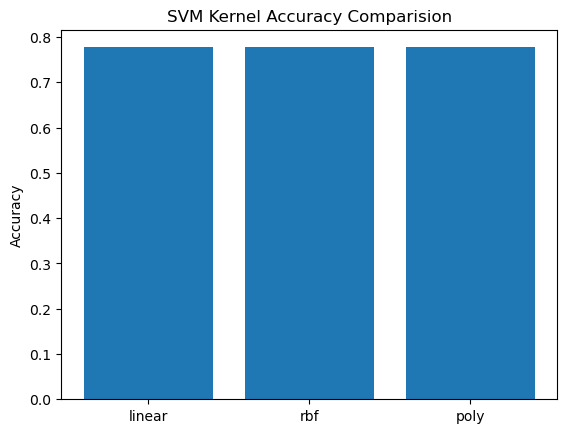

<Figure size 640x480 with 0 Axes>

In [17]:
#Accuracy Comparision
plt.bar(results.keys(),results.values())
plt.title("SVM Kernel Accuracy Comparision")
plt.ylabel('Accuracy')
plt.show()
plt.savefig("svm_acc_4.png")

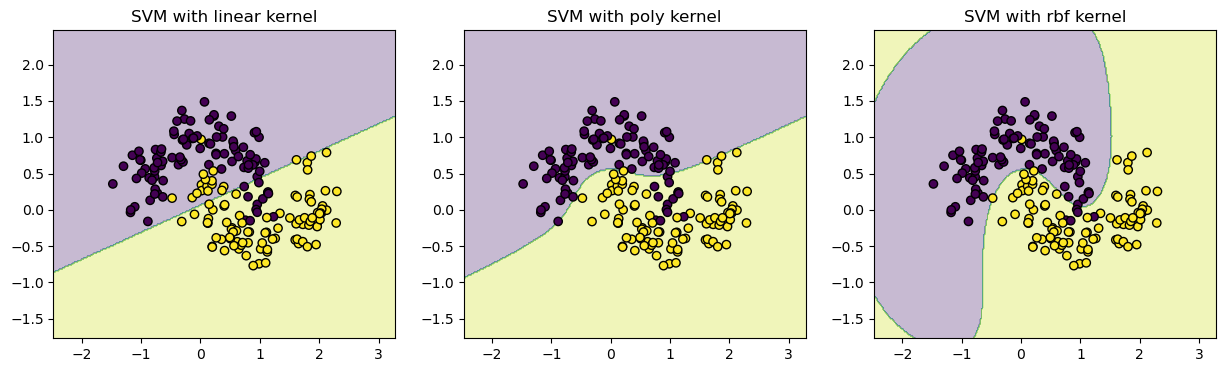

In [18]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Define kernels
kernels = ['linear', 'poly', 'rbf']

# Plot decision boundaries
plt.figure(figsize=(15,4))
for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, degree=3, gamma='scale')
    model.fit(X, y)
    
    # Create grid for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"SVM with {kernel} kernel")

plt.show()
